In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
df=pd.read_excel(r"D:\projectyoutube\copper\Copper_Set.xlsx")

In [3]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [6]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
df['item_date'] = pd.to_datetime(df['item_date'].astype(int).astype(str),format='%Y%m%d', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'].astype(int).astype(str),format='%Y%m%d', errors='coerce')
df['quantity tons'] = pd.to_numeric(df['quantity tons'],errors="coerce")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             181671 non-null  object        
 1   item_date      181671 non-null  datetime64[ns]
 2   quantity tons  181672 non-null  float64       
 3   customer       181672 non-null  float64       
 4   country        181645 non-null  float64       
 5   status         181671 non-null  object        
 6   item type      181673 non-null  object        
 7   application    181649 non-null  float64       
 8   thickness      181672 non-null  float64       
 9   width          181673 non-null  float64       
 10  material_ref   103754 non-null  object        
 11  product_ref    181673 non-null  int64         
 12  delivery date  181671 non-null  datetime64[ns]
 13  selling_price  181672 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(4

In [10]:
df.isnull().sum()

id                   2
item_date            2
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        2
selling_price        1
dtype: int64

In [19]:
df['material_ref'] = df['material_ref'].fillna('unknown')

In [20]:
df = df.drop(["id"], axis=1) # hence id & material_ref has unique value thus we dont need this feature for our ML model
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [21]:
df['item_date'].ffill(inplace=True)
df['delivery date'].ffill(inplace=True)

C:\Users\aarun\AppData\Local\Temp\ipykernel_20488\1934981318.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['item_date'].ffill(inplace=True)
C:\Users\aarun\AppData\Local\Temp\ipykernel_20488\1934981318.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [22]:
df.isnull().sum()

item_date         0
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     0
selling_price     1
dtype: int64

In [27]:
df1 = df.drop(["customer"],axis=1)
df1.head()

,item_date,quantity tons,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,2021-04-01,202.411065,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [29]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,181673,2020-11-26 22:57:42.894321408,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-11-30 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,181672.0,5874.925754,-2000.0,10.970298,30.364635,67.160612,1000000000.0,2349081.241674
country,181645.0,44.893022,25.0,26.0,30.0,78.0,113.0,24.404214
application,181649.0,25.615809,2.0,10.0,15.0,41.0,99.0,17.754175
thickness,181672.0,2.564827,0.18,0.7,1.5,3.0,2500.0,6.572321
width,181673.0,1295.286724,1.0,1180.0,1250.0,1500.0,2990.0,261.631754
product_ref,181673.0,473967910.724318,611728.0,611993.0,640665.0,1332077137.0,1722207579.0,717510064.710402
delivery date,181673,2021-01-25 22:45:30.501505280,2019-04-01 00:00:00,2020-11-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,181672.0,1918.035505,-1160.0,669.0,812.0,953.0,100001015.0,331795.642555


In [30]:
df1['quantity tons'] = df1['quantity tons'].mask((df1['quantity tons']<=0), np.nan)
df1['selling_price'] = df1['selling_price'].mask((df1['selling_price']<=0), np.nan)

In [31]:
df1.isnull().sum()

item_date         0
quantity tons     5
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     0
selling_price     8
dtype: int64

In [35]:
df1['quantity tons'].mean()
df1['country'].mode()
df1['application'].median()
df1['thickness'].median()

1.5

In [36]:

df1['quantity tons'].fillna(df1['quantity tons'].mean(),inplace=True)
df1['country'].fillna(df1['country'].mode()[0],inplace=True)
df1['application'].fillna( df1['application'].median() , inplace=True)
df1['thickness'].fillna( df1['thickness'].median(), inplace=True)
df1['selling_price'].fillna(df1['selling_price'].median(), inplace= True )

C:\Users\aarun\AppData\Local\Temp\ipykernel_20488\3061186648.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['quantity tons'].fillna(df1['quantity tons'].mean(),inplace=True)
C:\Users\aarun\AppData\Local\Temp\ipykernel_20488\3061186648.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [38]:
df1.isnull().sum()

item_date        0
quantity tons    0
country          0
status           2
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [39]:
df1['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [40]:
df1 = df1[ ( df1['status'] == "Won" ) | ( df1['status'] == "Lost" )].reset_index(drop=True)

In [43]:
df1.isnull().sum()

item_date        0
quantity tons    0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [44]:
df1.shape


(150448, 12)

Outlier Treatment

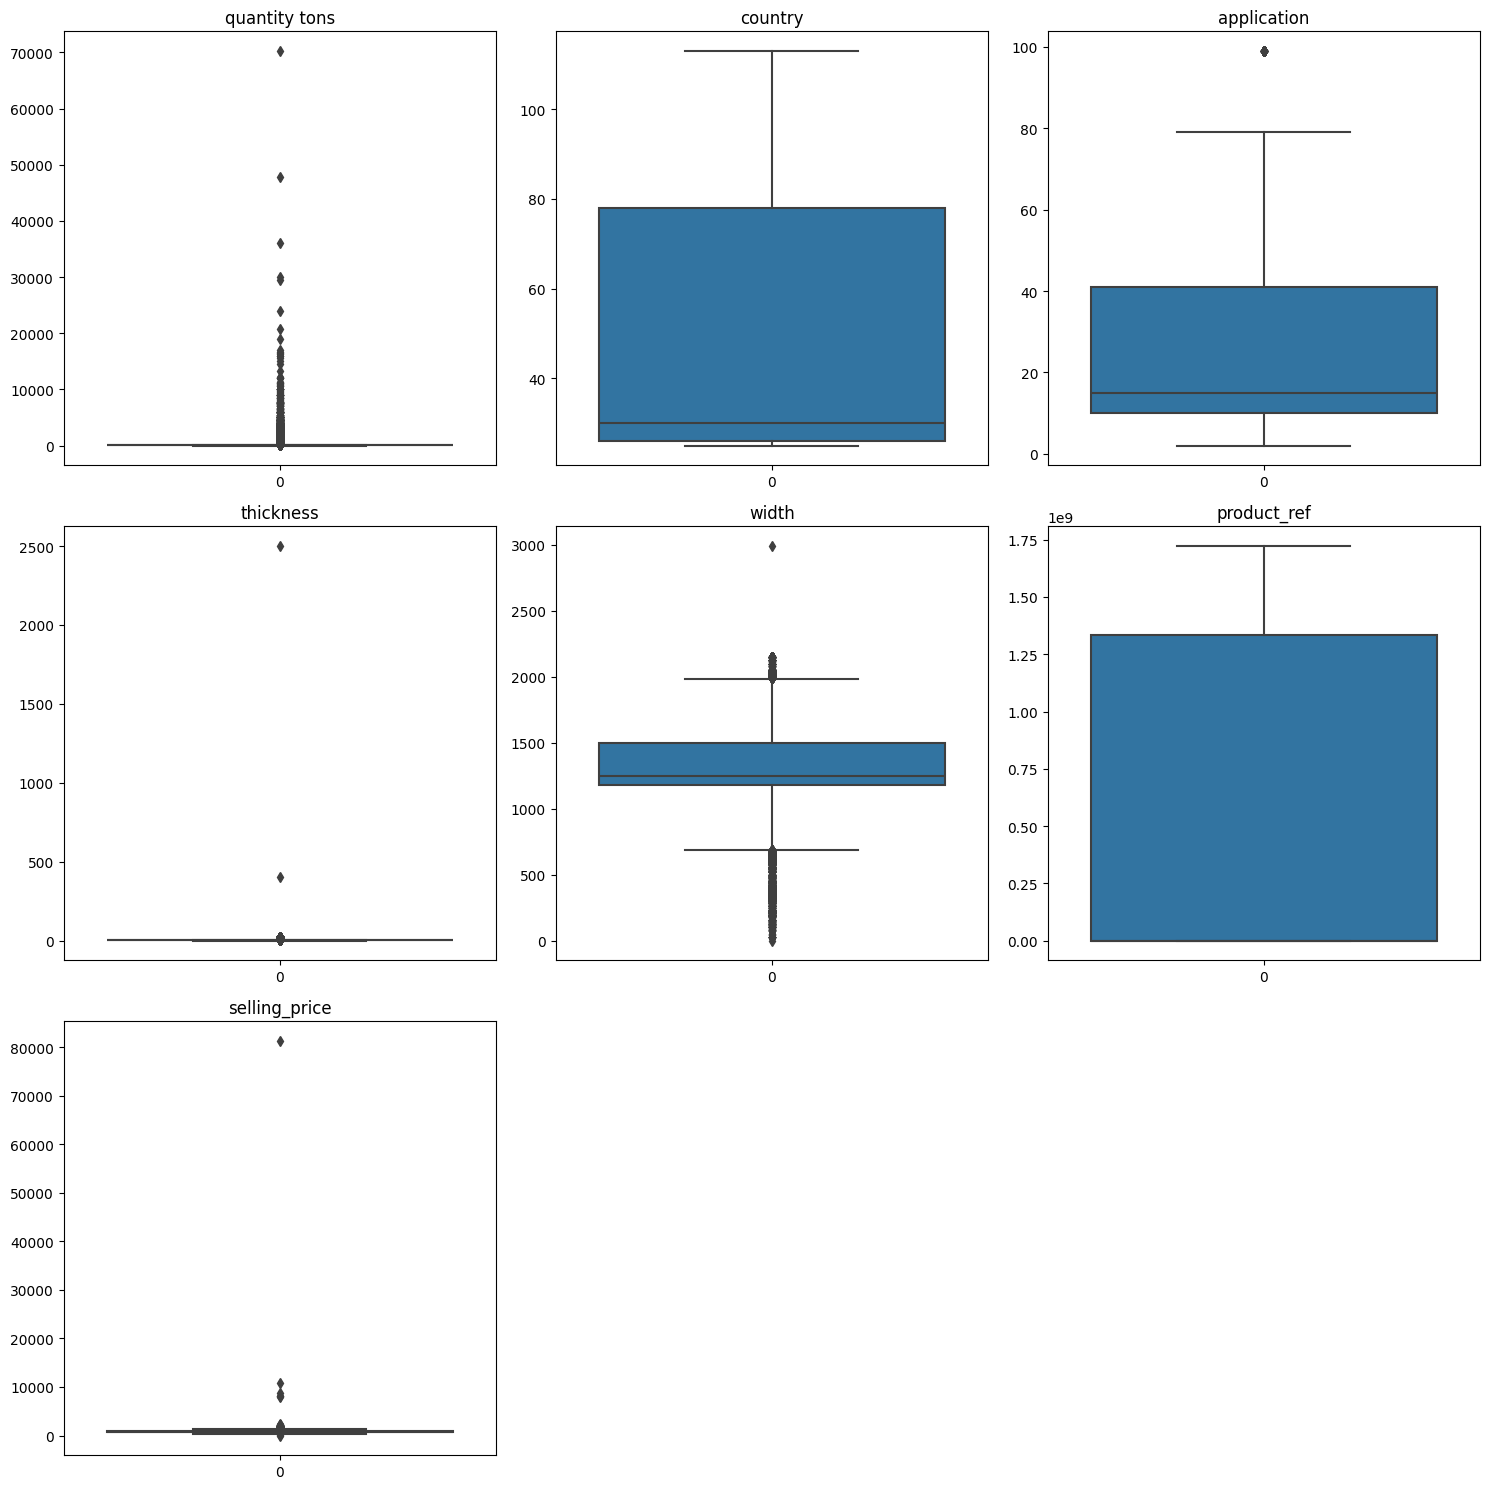

In [48]:
#Plotting the boxplot of numerical columns to check outliers
raw_numerical_columns = df1.select_dtypes(include=['number']).columns.tolist()
numerical_columns = [column for column in raw_numerical_columns]

nc_df = df1
num_plots = len(numerical_columns)
num_cols = min(num_plots, 3)  
num_rows = (num_plots - 1) // num_cols + 1 if num_plots > 1 else 1 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_plots > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for i, col in enumerate(numerical_columns):
    sns.boxplot(nc_df[col], ax=axes[i])
    axes[i].set_title(col)

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.show(fig)

In [49]:
#Skewness of features
skew_numerical_columns = df1.select_dtypes(include=['number']).columns.tolist()
numerical_columns = [column for column in skew_numerical_columns]
for i in numerical_columns:
    print('Skewness of:',i,skew(df1[i]))

Skewness of: quantity tons 53.49598981514484
Skewness of: country 0.7082416400365593
Skewness of: application 0.7510267164558581
Skewness of: thickness 288.705150680822
Skewness of: width 0.35274733384761203
Skewness of: product_ref 1.013449706820693
Skewness of: selling_price 141.49797045689152


In [51]:
df1.columns

Index(['item_date', 'quantity tons', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'material_ref', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

In [52]:
df1["quantity_kg_log"] = np.log(df1['quantity tons'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1['thickness_log'] = np.log(df1['thickness'])

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


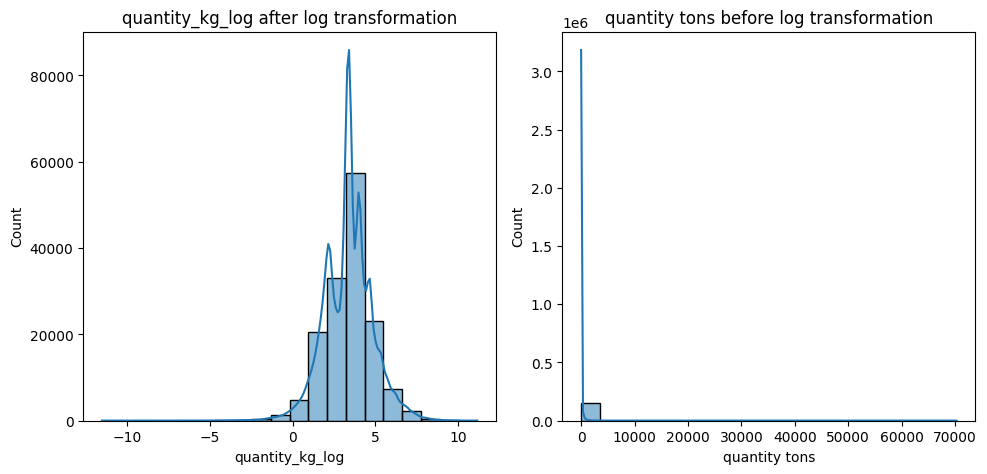

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


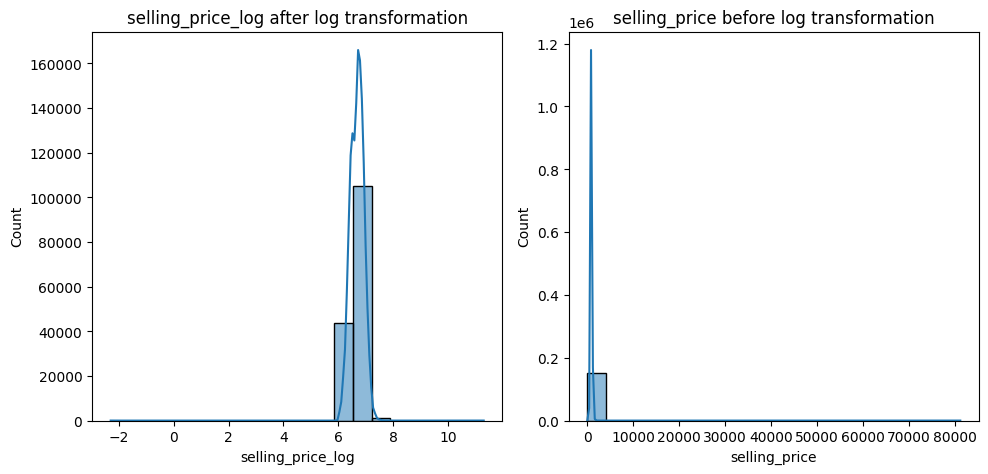

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


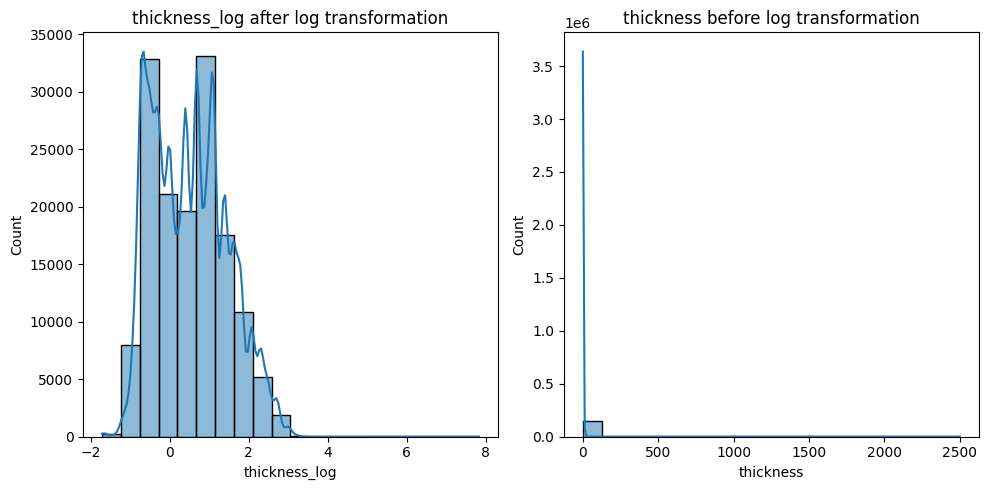

In [53]:
col1 = [ "quantity_kg_log", 'selling_price_log','thickness_log' ]
col2 = [ "quantity tons", 'selling_price','thickness' ]

def dis_compare_chart(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig, axs = plt.subplots( 1,2,figsize=(10,5))
        sns.histplot(data=df, x=col1, kde=True, bins=20,ax= axs[0])
        sns.histplot(data=df, x=col2, kde=True, bins=20,ax= axs[1])
        axs[0].set_title(f"{col1} after log transformation")
        axs[1].set_title(f"{col2} before log transformation")
        plt.tight_layout()
        plt.show()
dis_compare_chart(df1, col1, col2)

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


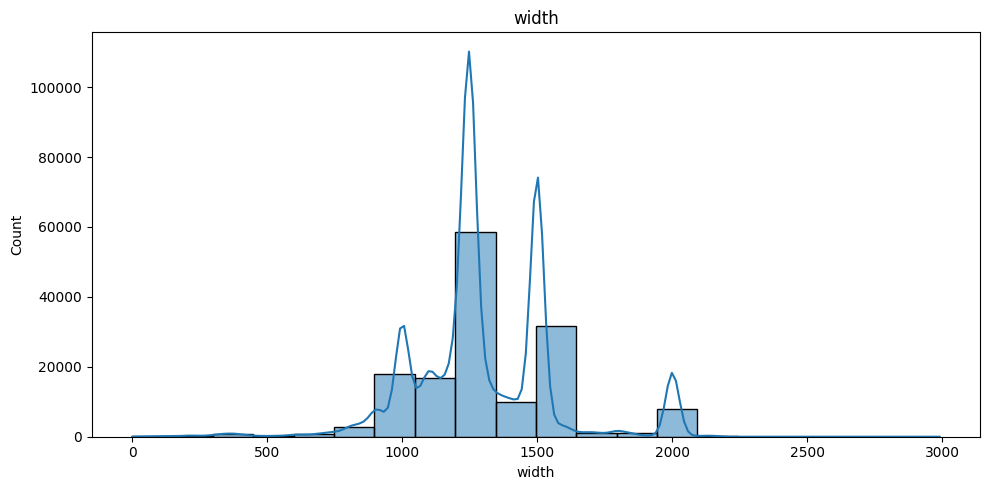

In [54]:
fig, axs = plt.subplots( 1,1,figsize=(10,5))
sns.histplot(data=df1, x="width", kde=True, bins=20,ax= axs)
axs.set_title("width")
plt.tight_layout()
plt.show()

In [55]:
df2 = df1[(df1['quantity_kg_log']>0) & (df1['selling_price_log']>0)].reset_index(drop=True)
df2.shape

(148400, 15)

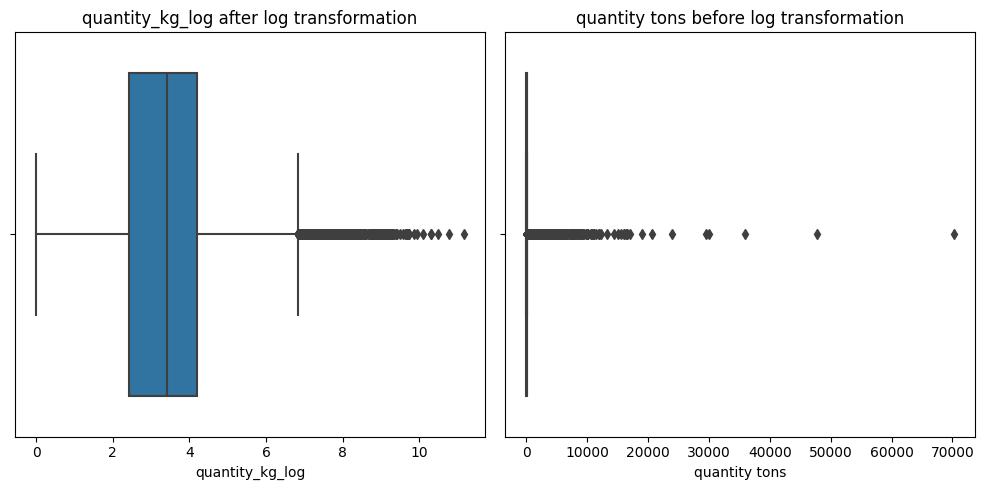

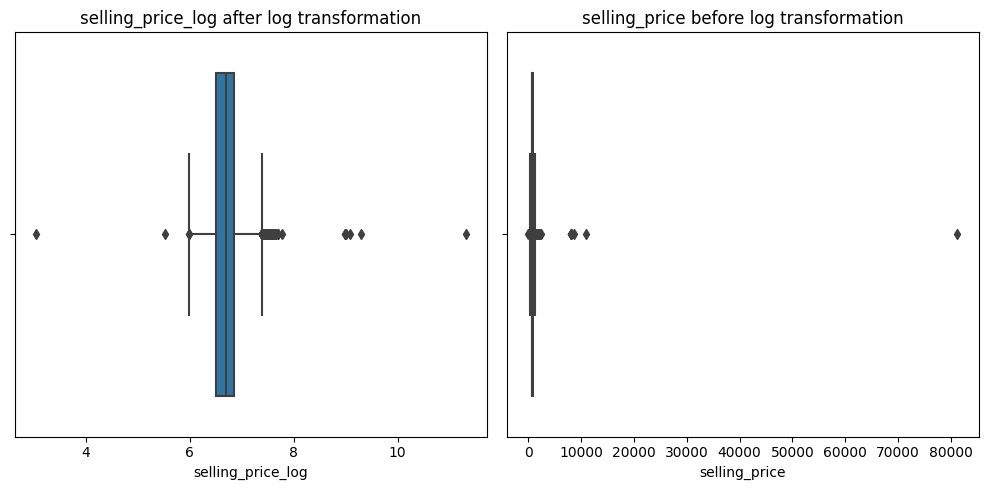

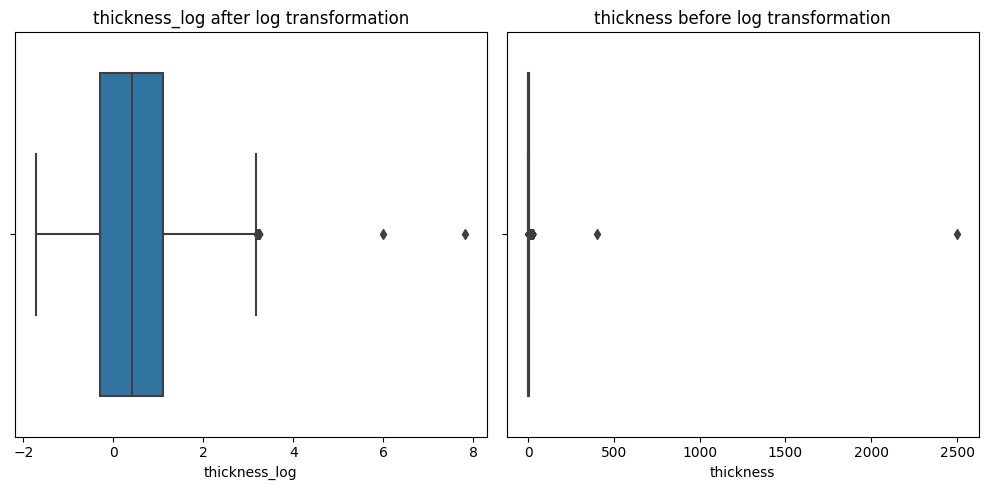

In [58]:
def outlier_compare_boxchart_log(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig, axs = plt.subplots( 1,2,figsize=(10,5))
        sns.boxplot(data=df, x=col1,ax= axs[0])
        sns.boxplot(data=df, x=col2, ax= axs[1])
        axs[0].set_title(f"{col1} after log transformation")
        axs[1].set_title(f"{col2} before log transformation")
        plt.tight_layout()
        plt.show()
outlier_compare_boxchart_log(df2,col1,col2)

<Axes: >

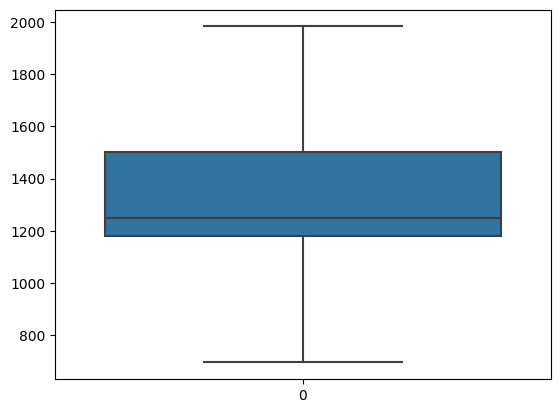

In [56]:
# Treating the outliers

Q1 = df2["width"].quantile(0.25)
Q3 = df2['width'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df2['width'] = df2['width'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df2['width'])

In [60]:
df2.columns

Index(['item_date', 'quantity tons', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'material_ref', 'product_ref',
       'delivery date', 'selling_price', 'quantity_kg_log',
       'selling_price_log', 'thickness_log'],
      dtype='object')

<Axes: >

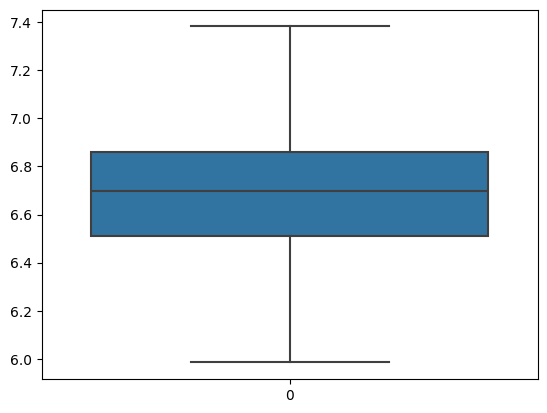

In [61]:
Q1 = df2['selling_price_log'].quantile(0.25)
Q3 = df2['selling_price_log'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df2['selling_price_log'] = df2['selling_price_log'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df2['selling_price_log'])

<Axes: >

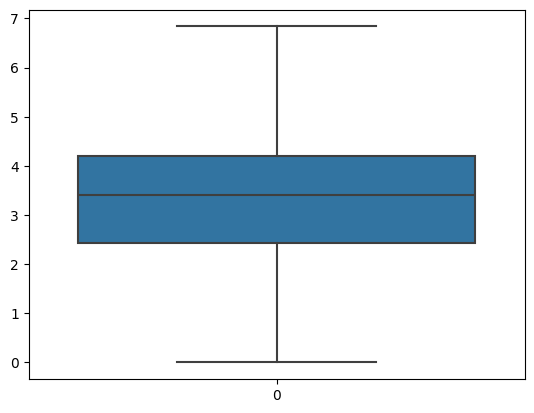

In [62]:
Q1 = df2['quantity_kg_log'].quantile(0.25)
Q3 = df2['quantity_kg_log'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df2['quantity_kg_log'] = df2['quantity_kg_log'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df2['quantity_kg_log'])

<Axes: >

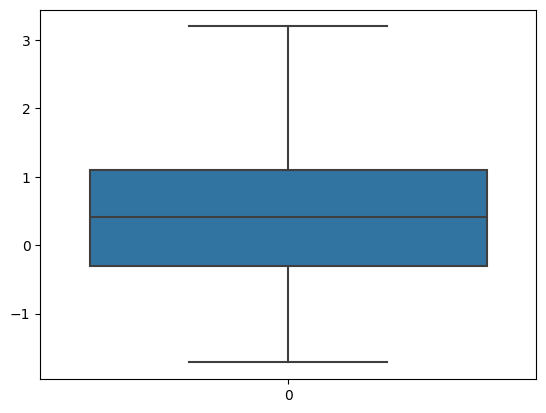

In [63]:
Q1 = df2['thickness_log'].quantile(0.25)
Q3 = df2['thickness_log'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df2['thickness_log'] = df2['thickness_log'].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df2['thickness_log'])

In [64]:
df2.shape

(148400, 15)

In [65]:
df2.reset_index(drop=True)

,item_date,quantity tons,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity_kg_log,selling_price_log,thickness_log
0,2021-04-01,54.151139,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,6.749931,0.693147
1,2021-04-01,768.024839,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00,6.643822,6.953684,-0.223144
2,2021-04-01,386.127949,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,6.468211,-0.967584
3,2021-04-01,202.411065,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,6.643790,0.832909
4,2021-04-01,785.526262,28.0,Won,W,10.0,4.00,1983.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,6.357842,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148395,2020-07-02,102.482422,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,2020-07-01,591.00,4.629691,6.381816,-0.040822
148396,2020-07-02,208.086469,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,2020-07-01,589.00,5.337954,6.378426,-0.051293
148397,2020-07-02,4.235594,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,2020-07-01,619.00,1.443523,6.428105,-0.342490
148398,2020-07-02,5875.066247,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,2020-07-01,601.00,6.837214,6.398595,-0.162519


In [66]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,148400,2020-11-27 03:45:16.010781952,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-12-01 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
quantity tons,148400.0,95.925639,1.000003,11.364334,30.29778,66.232643,70252.363068,444.818675
country,148400.0,45.348288,25.0,26.0,30.0,78.0,113.0,24.475825
application,148400.0,25.193989,2.0,10.0,15.0,41.0,99.0,17.645507
thickness,148400.0,2.625962,0.18,0.74,1.5,3.0,2500.0,7.159368
width,148400.0,1300.397809,695.0,1178.0,1250.0,1500.0,1983.0,253.647165
product_ref,148400.0,476325697.331536,611728.0,628377.0,640665.0,1332077137.0,1722207579.0,718089991.785838
delivery date,148400,2021-01-23 22:20:24.194070016,2019-04-01 00:00:00,2020-10-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
selling_price,148400.0,825.699223,21.01,671.0,811.0,951.0,81236.14,291.789783
quantity_kg_log,148400.0,3.423091,0.000003,2.43048,3.411074,4.193173,6.837214,1.331215


In [67]:
df2["delivery_days"] = (df2['delivery date'] - df2['item_date']).dt.days

In [68]:
df2.head()

,item_date,quantity tons,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity_kg_log,selling_price_log,thickness_log,delivery_days
0,2021-04-01,54.151139,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,6.749931,0.693147,91
1,2021-04-01,768.024839,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00,6.643822,6.953684,-0.223144,0
2,2021-04-01,386.127949,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,6.468211,-0.967584,-90
3,2021-04-01,202.411065,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,6.643790,0.832909,-90
4,2021-04-01,785.526262,28.0,Won,W,10.0,4.00,1983.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,6.357842,1.386294,-31


In [70]:
len(df2["material_ref"].unique())

15804

In [73]:
df2['material_ref'] = df2['material_ref'].str.lstrip('0')

In [74]:
df2["material_ref"].unique()

array(['DEQ1 S460MC', '104991', 'S0380700', ..., 'MAS65270', 'MAS65550',
       '202006170005.IO.1.1'], dtype=object)

Delivery date in negative so there may be error

In [75]:
df2['item_date_day'] = df2['item_date'].dt.day
df2['item_date_month'] = df2['item_date'].dt.month
df2['item_date_year'] = df2['item_date'].dt.year
df2['delivery date_day'] = df2['delivery date'].dt.day
df2['delivery date_month'] = df2['delivery date'].dt.month
df2['delivery date_year'] = df2['delivery date'].dt.year

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148400 entries, 0 to 148399
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   item_date            148400 non-null  datetime64[ns]
 1   quantity tons        148400 non-null  float64       
 2   country              148400 non-null  float64       
 3   status               148400 non-null  object        
 4   item type            148400 non-null  object        
 5   application          148400 non-null  float64       
 6   thickness            148400 non-null  float64       
 7   width                148400 non-null  float64       
 8   material_ref         148400 non-null  object        
 9   product_ref          148400 non-null  int64         
 10  delivery date        148400 non-null  datetime64[ns]
 11  selling_price        148400 non-null  float64       
 12  quantity_kg_log      148400 non-null  float64       
 13  selling_price_

In [77]:
df2.head()

,item_date,quantity tons,country,status,item type,application,thickness,width,material_ref,product_ref,...,quantity_kg_log,selling_price_log,thickness_log,delivery_days,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,2021-04-01,54.151139,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,...,3.991779,6.749931,0.693147,91,1,4,2021,1,7,2021
1,2021-04-01,768.024839,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,...,6.643822,6.953684,-0.223144,0,1,4,2021,1,4,2021
2,2021-04-01,386.127949,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,...,5.956169,6.468211,-0.967584,-90,1,4,2021,1,1,2021
3,2021-04-01,202.411065,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,...,5.310301,6.643790,0.832909,-90,1,4,2021,1,1,2021
4,2021-04-01,785.526262,28.0,Won,W,10.0,4.00,1983.0,2_S275JR+AR-CL1,640665,...,6.666354,6.357842,1.386294,-31,1,4,2021,1,3,2021


In [86]:
df3=df2.copy()

In [84]:
df2

,item_date,quantity tons,country,status,item type,application,thickness,width,material_ref,product_ref,...,quantity_kg_log,selling_price_log,thickness_log,delivery_days,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,2021-04-01,54.151139,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,...,3.991779,6.749931,0.693147,91,1,4,2021,1,7,2021
1,2021-04-01,768.024839,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,...,6.643822,6.953684,-0.223144,0,1,4,2021,1,4,2021
2,2021-04-01,386.127949,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,...,5.956169,6.468211,-0.967584,-90,1,4,2021,1,1,2021
3,2021-04-01,202.411065,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,...,5.310301,6.643790,0.832909,-90,1,4,2021,1,1,2021
4,2021-04-01,785.526262,28.0,Won,W,10.0,4.00,1983.0,2_S275JR+AR-CL1,640665,...,6.666354,6.357842,1.386294,-31,1,4,2021,1,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148395,2020-07-02,102.482422,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,...,4.629691,6.381816,-0.040822,-1,2,7,2020,1,7,2020
148396,2020-07-02,208.086469,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,...,5.337954,6.378426,-0.051293,-1,2,7,2020,1,7,2020
148397,2020-07-02,4.235594,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,...,1.443523,6.428105,-0.342490,-1,2,7,2020,1,7,2020
148398,2020-07-02,5875.066247,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,...,6.837214,6.398595,-0.162519,-1,2,7,2020,1,7,2020


In [81]:
df3[] = df3.drop(df3[df3['delivery_days'] < 0].index, inplace=True)

In [91]:
df3 = df3[df3['delivery_days'] >= 0]
df3.head().T

,0,1,5,7,8
item_date,2021-04-01 00:00:00,2021-04-01 00:00:00,2021-04-01 00:00:00,2021-04-01 00:00:00,2021-04-01 00:00:00
quantity tons,54.151139,768.024839,225.790676,69.071853,630.626917
country,28.0,25.0,25.0,38.0,25.0
status,Won,Won,Won,Won,Won
item type,W,W,W,S,W
application,10.0,41.0,41.0,10.0,41.0
thickness,2.0,0.8,1.5,0.6,1.5
width,1500.0,1210.0,1265.0,1275.0,1165.0
material_ref,DEQ1 S460MC,104991,102325,106786,102325
product_ref,1670798778,1668701718,1668701718,1668701376,1668701718


In [90]:
df3.columns

Index(['item_date', 'quantity tons', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'material_ref', 'product_ref',
       'delivery date', 'selling_price', 'quantity_kg_log',
       'selling_price_log', 'thickness_log', 'delivery_days', 'item_date_day',
       'item_date_month', 'item_date_year', 'delivery date_day',
       'delivery date_month', 'delivery date_year'],
      dtype='object')

In [97]:
df3

,country,status,item type,application,width,product_ref,quantity_kg_log,selling_price_log,thickness_log,delivery_days,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,28.0,Won,W,10.0,1500.0,1670798778,3.991779,6.749931,0.693147,91,1,4,2021,1,7,2021
1,25.0,Won,W,41.0,1210.0,1668701718,6.643822,6.953684,-0.223144,0,1,4,2021,1,4,2021
5,25.0,Won,W,41.0,1265.0,1668701718,5.419608,6.890609,0.405465,0,1,4,2021,1,4,2021
7,38.0,Won,S,10.0,1275.0,1668701376,4.235147,7.217443,-0.510826,91,1,4,2021,1,7,2021
8,25.0,Won,W,41.0,1165.0,1668701718,6.446714,6.890609,0.405465,0,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148180,25.0,Lost,S,15.0,1983.0,640665,3.472467,6.313548,1.791759,30,2,7,2020,1,8,2020
148267,30.0,Lost,S,10.0,1525.0,640665,4.196171,6.126869,1.348073,30,2,7,2020,1,8,2020
148269,30.0,Lost,S,10.0,1525.0,640665,4.156686,6.124683,1.766442,30,2,7,2020,1,8,2020
148271,30.0,Lost,S,10.0,1500.0,640665,4.025862,6.126869,2.060514,30,2,7,2020,1,8,2020


In [98]:
df4=df3.copy()

In [100]:
df4.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_kg_log', 'selling_price_log', 'thickness_log',
       'delivery_days', 'item_date_day', 'item_date_month', 'item_date_year',
       'delivery date_day', 'delivery date_month', 'delivery date_year'],
      dtype='object')

In [ ]:
df4=df4.drop(["item_date", 'quantity tons','thickness','delivery date', 'selling_price','material_ref'],axis=1)

In [101]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133990 entries, 0 to 148273
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              133990 non-null  float64
 1   status               133990 non-null  object 
 2   item type            133990 non-null  object 
 3   application          133990 non-null  float64
 4   width                133990 non-null  float64
 5   product_ref          133990 non-null  int64  
 6   quantity_kg_log      133990 non-null  float64
 7   selling_price_log    133990 non-null  float64
 8   thickness_log        133990 non-null  float64
 9   delivery_days        133990 non-null  int64  
 10  item_date_day        133990 non-null  int32  
 11  item_date_month      133990 non-null  int32  
 12  item_date_year       133990 non-null  int32  
 13  delivery date_day    133990 non-null  int32  
 14  delivery date_month  133990 non-null  int32  
 15  delivery date_year   1

<Axes: >

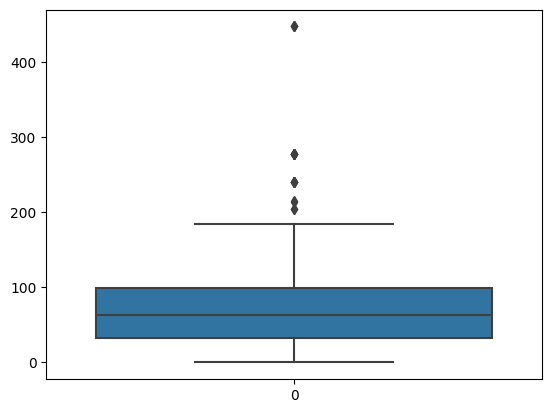

In [104]:
sns.boxplot(df4["delivery_days"])

<Axes: >

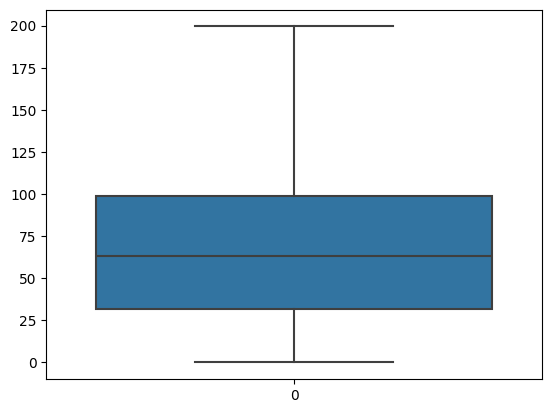

In [105]:
Q1 = df4["delivery_days"].quantile(0.25)
Q3 = df4["delivery_days"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers to the bounds
df4["delivery_days"] = df4["delivery_days"].clip(lower=lower_bound, upper=upper_bound)
sns.boxplot(df4['delivery_days'])

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


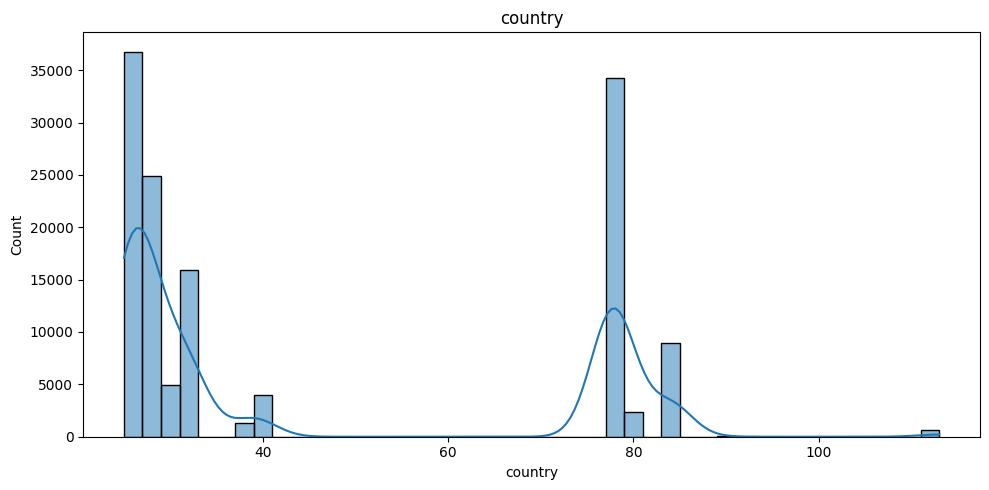

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


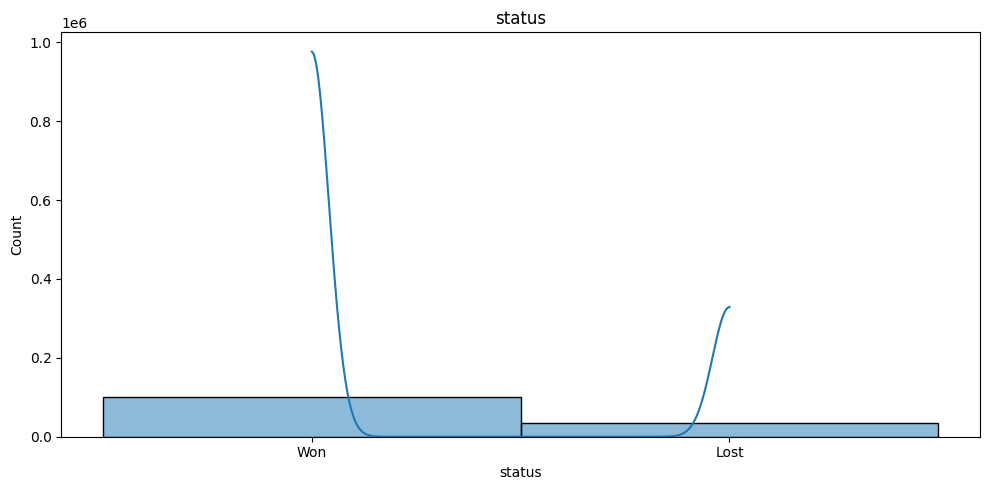

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


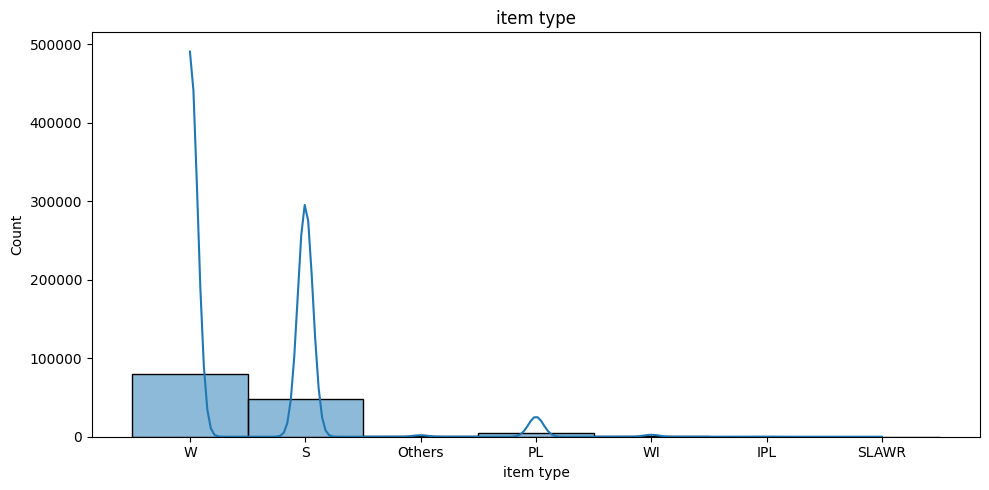

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


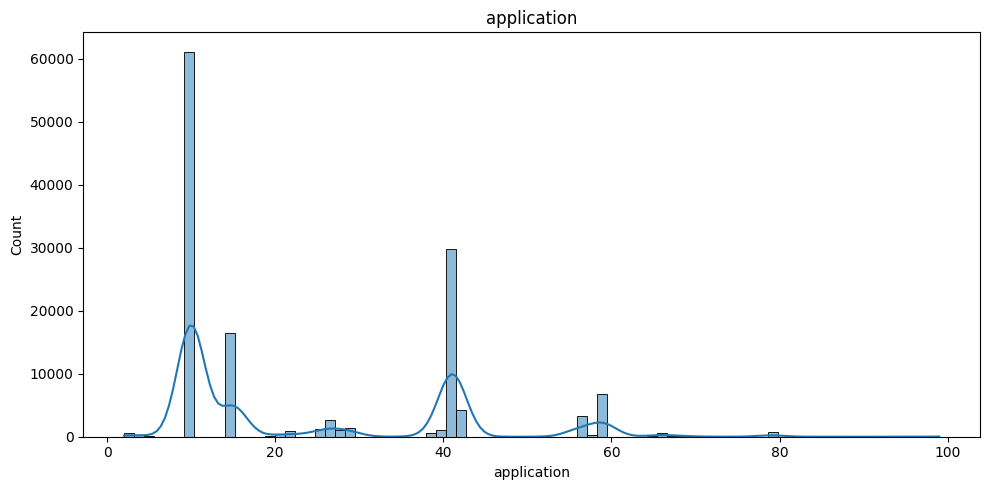

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


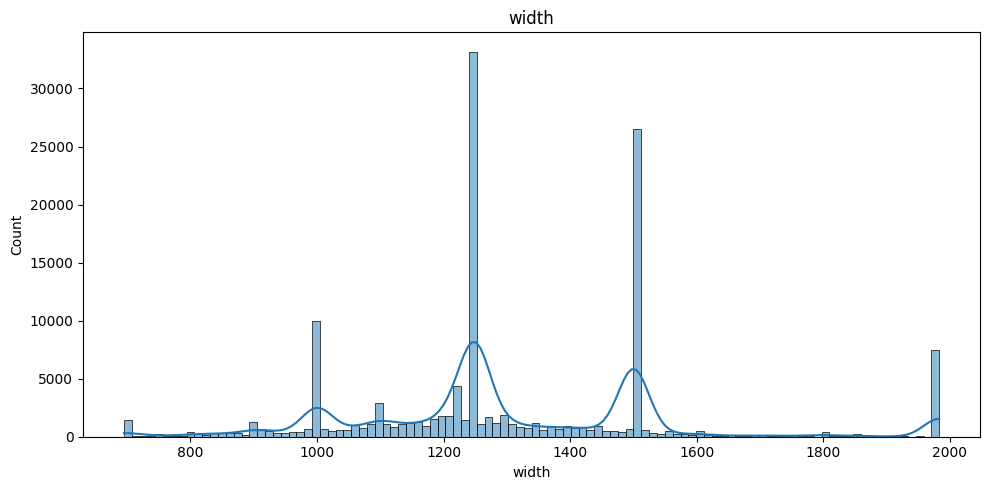

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


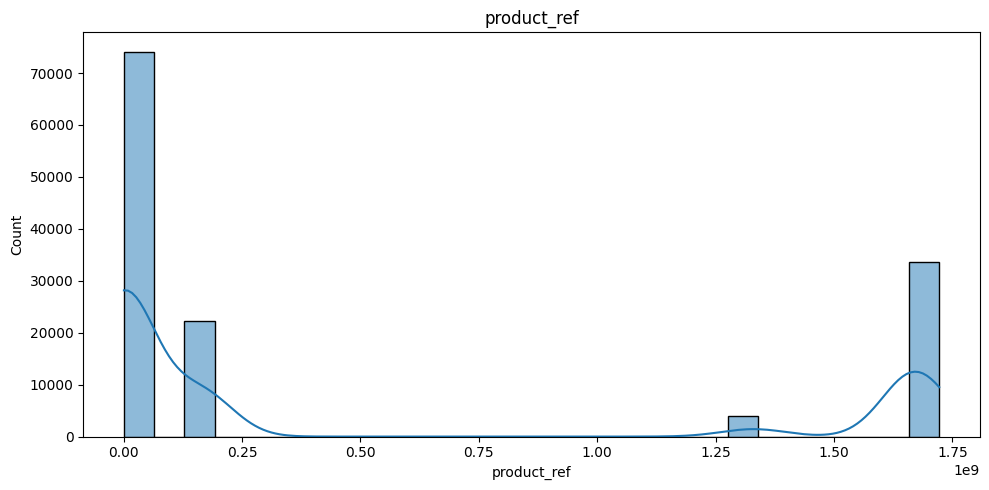

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


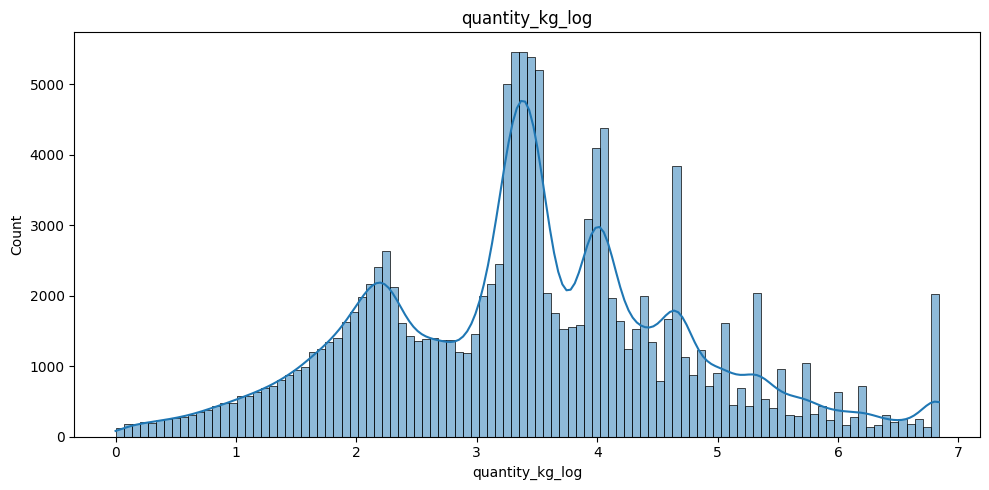

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


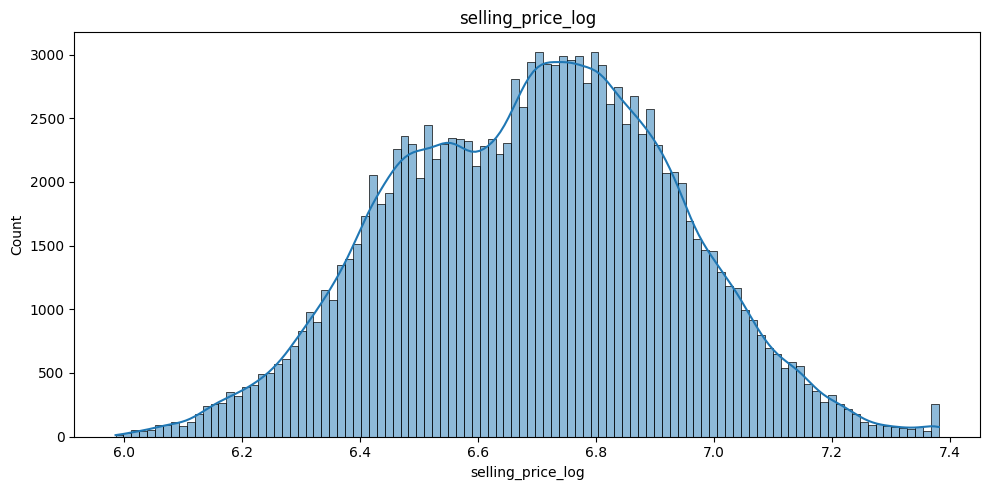

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


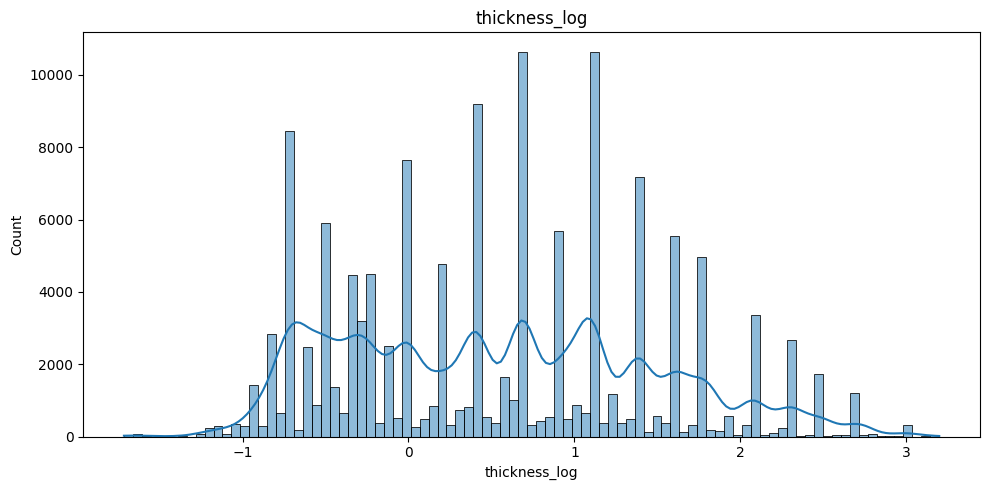

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


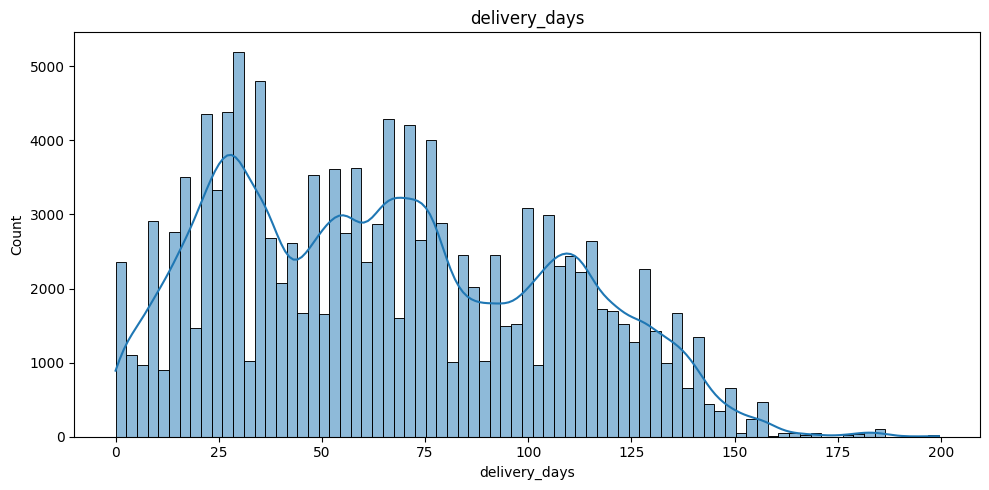

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


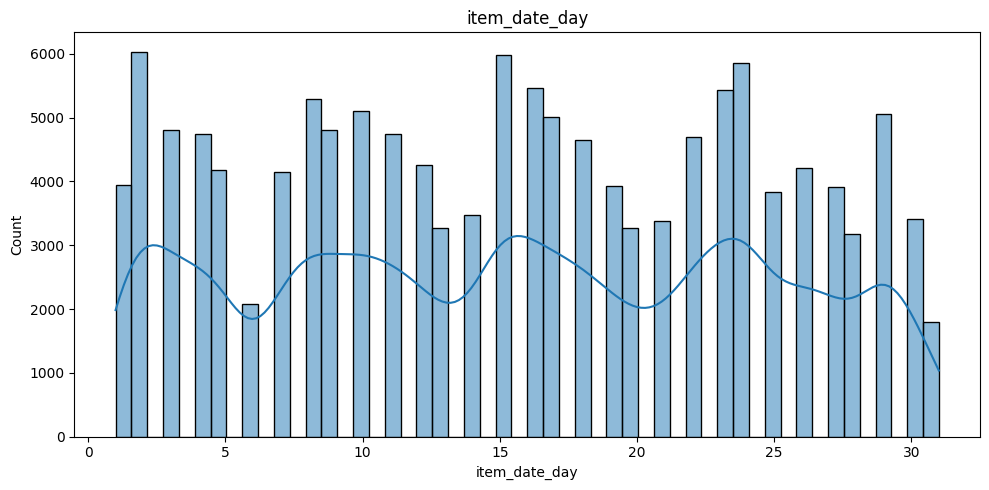

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


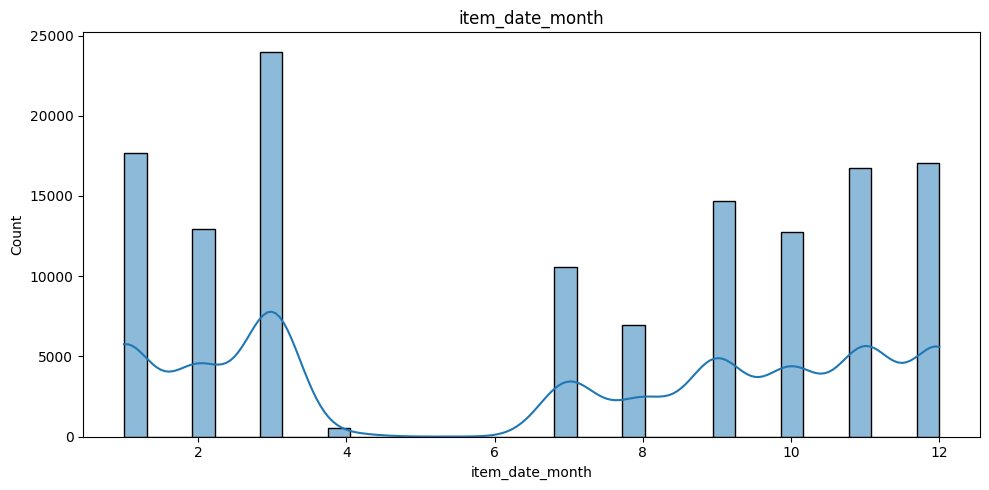

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


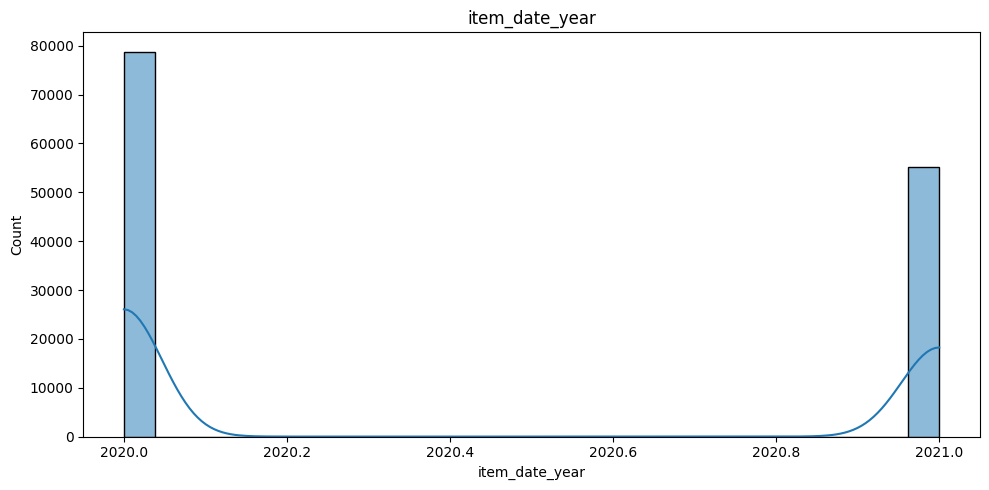

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


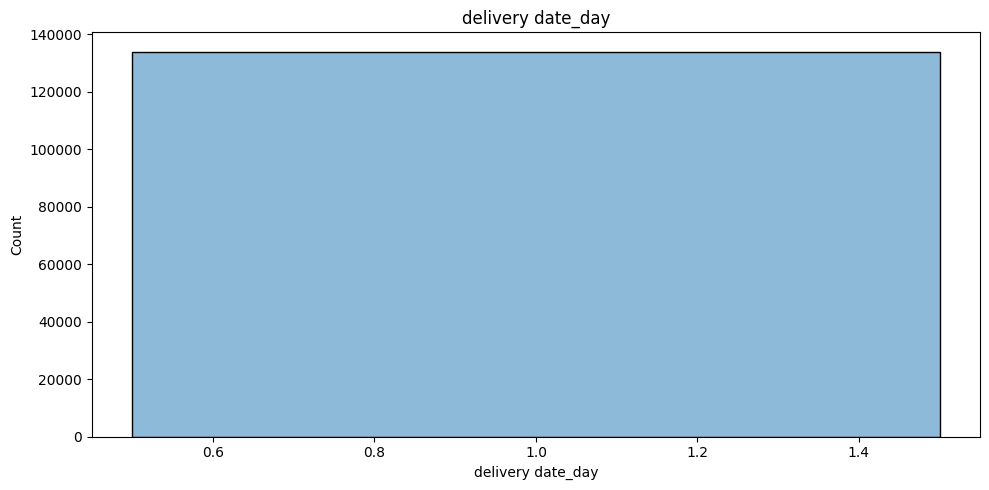

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


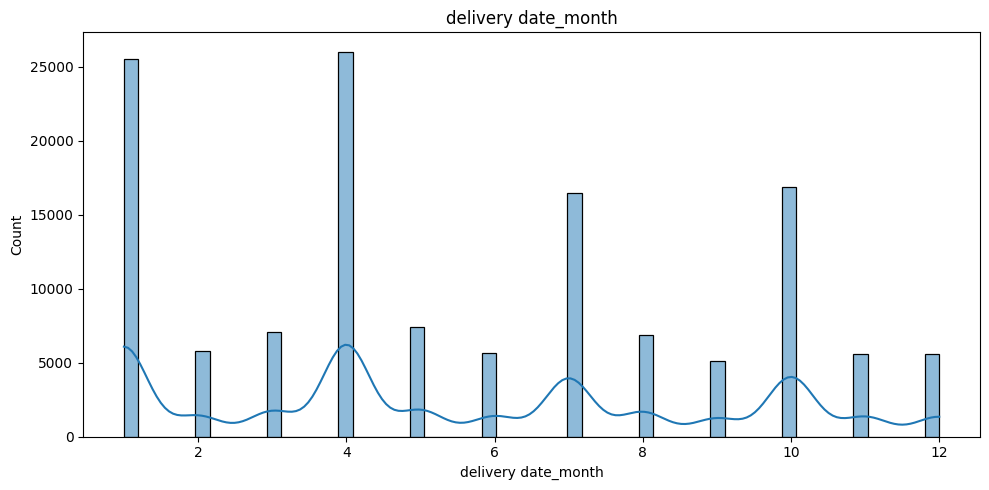

d:\projectyoutube\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


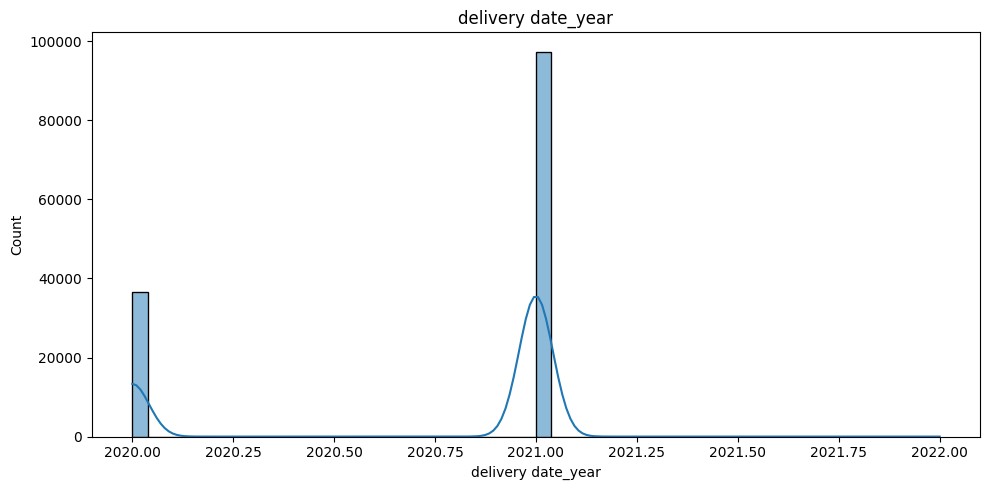

In [106]:
for i in df4.columns:    
    fig, axs = plt.subplots( 1,1,figsize=(10,5))
    sns.histplot(data=df4, x=i,kde=True,ax= axs)
    axs.set_title(i)
    plt.tight_layout()
    plt.show()

In [107]:

df4['item type'].unique()

array(['W', 'S', 'Others', 'PL', 'WI', 'IPL', 'SLAWR'], dtype=object)

In [108]:
df5=df4.copy()

In [109]:
label_encoder =LabelEncoder() 
  
# Encode labels in column item type. 
df5["item type"]= label_encoder.fit_transform(df5["item type"])
df5['item type'].unique()

array([5, 3, 1, 2, 6, 0, 4])

In [110]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133990 entries, 0 to 148273
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              133990 non-null  float64
 1   status               133990 non-null  object 
 2   item type            133990 non-null  int32  
 3   application          133990 non-null  float64
 4   width                133990 non-null  float64
 5   product_ref          133990 non-null  int64  
 6   quantity_kg_log      133990 non-null  float64
 7   selling_price_log    133990 non-null  float64
 8   thickness_log        133990 non-null  float64
 9   delivery_days        133990 non-null  float64
 10  item_date_day        133990 non-null  int32  
 11  item_date_month      133990 non-null  int32  
 12  item_date_year       133990 non-null  int32  
 13  delivery date_day    133990 non-null  int32  
 14  delivery date_month  133990 non-null  int32  
 15  delivery date_year   1

Classification Model

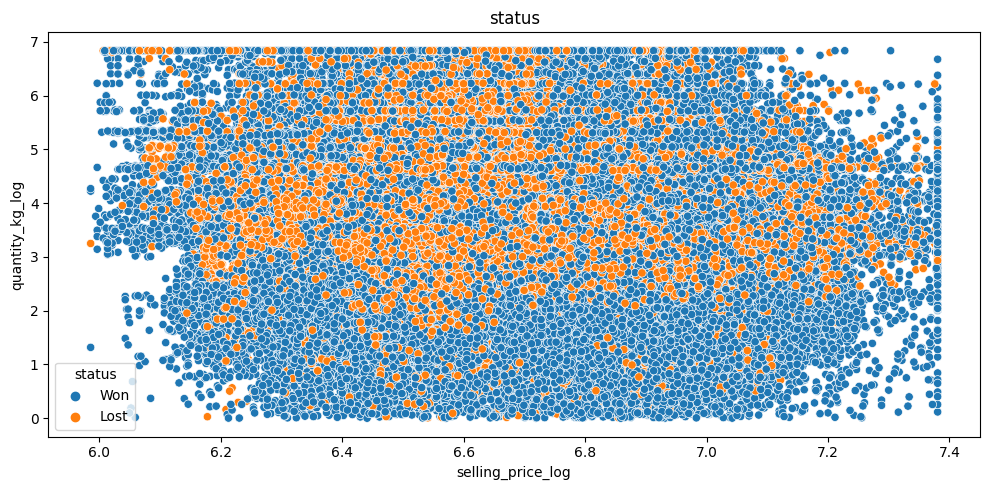

In [111]:
fig, axs = plt.subplots( 1,1,figsize=(10,5))
sns.scatterplot(data=df5, x="selling_price_log", y="quantity_kg_log",hue="status",ax= axs)
axs.set_title("status")
plt.tight_layout()
plt.show()

In [112]:
df5["status"].unique()

array(['Won', 'Lost'], dtype=object)

In [115]:
corr=df5.copy()

In [116]:
label_encoder =LabelEncoder() 
  
# Encode labels in column ' encoded_Credit_Mix'. 
corr["status"]= label_encoder.fit_transform(corr["status"])
corr["status"].unique()

array([1, 0])

In [117]:
corr.describe().corr()

,country,status,item type,application,width,product_ref,quantity_kg_log,selling_price_log,thickness_log,delivery_days,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
country,1.000000,1.000000,1.000000,1.000000,0.999946,-0.312282,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999889,1.000000,1.000000,0.999889
status,1.000000,1.000000,1.000000,1.000000,0.999940,-0.312839,1.000000,1.000000,1.000000,0.999999,1.000000,1.000000,0.999886,1.000000,1.000000,0.999886
item type,1.000000,1.000000,1.000000,1.000000,0.999940,-0.312822,1.000000,1.000000,1.000000,0.999999,1.000000,1.000000,0.999886,1.000000,1.000000,0.999886
application,1.000000,1.000000,1.000000,1.000000,0.999945,-0.312332,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999887,1.000000,1.000000,0.999887
width,0.999946,0.999940,0.999940,0.999945,1.000000,-0.307220,0.999940,0.999940,0.999940,0.999950,0.999942,0.999941,0.999945,0.999940,0.999941,0.999945
product_ref,-0.312282,-0.312839,-0.312822,-0.312332,-0.307220,1.000000,-0.312815,-0.312840,-0.312822,-0.311863,-0.312691,-0.312783,-0.313342,-0.312845,-0.312787,-0.313341
quantity_kg_log,1.000000,1.000000,1.000000,1.000000,0.999940,-0.312815,1.000000,1.000000,1.000000,0.999999,1.000000,1.000000,0.999886,1.000000,1.000000,0.999886
selling_price_log,1.000000,1.000000,1.000000,1.000000,0.999940,-0.312840,1.000000,1.000000,1.000000,0.999999,1.000000,1.000000,0.999886,1.000000,1.000000,0.999886
thickness_log,1.000000,1.000000,1.000000,1.000000,0.999940,-0.312822,1.000000,1.000000,1.000000,0.999999,1.000000,1.000000,0.999886,1.000000,1.000000,0.999886
delivery_days,1.000000,0.999999,0.999999,1.000000,0.999950,-0.311863,0.999999,0.999999,0.999999,1.000000,0.999999,0.999999,0.999889,0.999999,0.999999,0.999889


In [129]:
corr.isnull().sum()

country                0
status                 0
item type              0
application            0
width                  0
product_ref            0
quantity_kg_log        0
selling_price_log      0
thickness_log          0
delivery_days          0
item_date_day          0
item_date_month        0
item_date_year         0
delivery date_day      0
delivery date_month    0
delivery date_year     0
dtype: int64

In [140]:
X=df5.drop("status",axis=1).reset_index(drop=True)

In [141]:
X

,country,item type,application,width,product_ref,quantity_kg_log,selling_price_log,thickness_log,delivery_days,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,28.0,5,10.0,1500.0,1670798778,3.991779,6.749931,0.693147,91.0,1,4,2021,1,7,2021
1,25.0,5,41.0,1210.0,1668701718,6.643822,6.953684,-0.223144,0.0,1,4,2021,1,4,2021
2,25.0,5,41.0,1265.0,1668701718,5.419608,6.890609,0.405465,0.0,1,4,2021,1,4,2021
3,38.0,3,10.0,1275.0,1668701376,4.235147,7.217443,-0.510826,91.0,1,4,2021,1,7,2021
4,25.0,5,41.0,1165.0,1668701718,6.446714,6.890609,0.405465,0.0,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133985,25.0,3,15.0,1983.0,640665,3.472467,6.313548,1.791759,30.0,2,7,2020,1,8,2020
133986,30.0,3,10.0,1525.0,640665,4.196171,6.126869,1.348073,30.0,2,7,2020,1,8,2020
133987,30.0,3,10.0,1525.0,640665,4.156686,6.124683,1.766442,30.0,2,7,2020,1,8,2020
133988,30.0,3,10.0,1500.0,640665,4.025862,6.126869,2.060514,30.0,2,7,2020,1,8,2020


In [138]:
y=df5["status"].reset_index(drop=True)

In [139]:
y

0          Won
1          Won
2          Won
3          Won
4          Won
          ... 
133985    Lost
133986    Lost
133987    Lost
133988    Lost
133989    Lost
Name: status, Length: 133990, dtype: object

In [142]:
scaler = StandardScaler()
X = scaler.fit_transform(X.values)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (120591, 15)
Number transactions y_train dataset:  (120591,)
Number transactions X_test dataset:  (13399, 15)
Number transactions y_test dataset:  (13399,)


In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [143]:
# Creating dataframes for testing and training evaluation metrics
training_eval_df=pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','F1-Score'])
testing_eval_df=pd.DataFrame(columns=['Model','Accuracy','Recall','Precision','F1-Score'])

In [147]:
classm1=LogisticRegression(random_state=42,max_iter=1000)
classm1.fit(X_train, y_train)
y_test_pred = classm1.predict(X_test)

accuracy = accuracy_score(y_test_pred,y_test)
precision = precision_score(y_test_pred,y_test,average="weighted")
recall = recall_score(y_test_pred,y_test,average="weighted")
f1_score_value = f1_score(y_test_pred,y_test,average="weighted")


testing_eval_df.loc[len(testing_eval_df.index)] = ['Logistic Regression', accuracy, precision, recall, f1_score_value] 

In [148]:
testing_eval_df

,Model,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,0.795134,0.848176,0.795134,0.814104


In [149]:
classm2 = DecisionTreeClassifier(random_state=1)
# train the classifier
classm2.fit(X_train, y_train)

y_test_pred = classm2.predict(X_test)

accuracy = accuracy_score(y_test_pred,y_test)
precision = precision_score(y_test_pred,y_test,average="weighted")
recall = recall_score(y_test_pred,y_test,average="weighted")
f1_score_value = f1_score(y_test_pred,y_test,average="weighted")


testing_eval_df.loc[len(testing_eval_df.index)] = ['DecisionTree', accuracy, precision, recall, f1_score_value] 

In [150]:
classm3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
classm3.fit(X_train, y_train)

y_test_pred = classm3.predict(X_test)

accuracy = accuracy_score(y_test_pred,y_test)
precision = precision_score(y_test_pred,y_test,average="weighted")
recall = recall_score(y_test_pred,y_test,average="weighted")
f1_score_value = f1_score(y_test_pred,y_test,average="weighted")


testing_eval_df.loc[len(testing_eval_df.index)] = ['RandomForestClassifier', accuracy, precision, recall, f1_score_value] 

In [152]:
classm4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
classm4.fit(X_train, y_train)

y_test_pred = classm4.predict(X_test)

accuracy = accuracy_score(y_test_pred,y_test)
precision = precision_score(y_test_pred,y_test,average="weighted")
recall = recall_score(y_test_pred,y_test,average="weighted")
f1_score_value = f1_score(y_test_pred,y_test,average="weighted")


testing_eval_df.loc[len(testing_eval_df.index)] = ['GradientBoostingClassifier', accuracy, precision, recall, f1_score_value] 

In [153]:
classm5 = KNeighborsClassifier(n_neighbors=3)
classm5.fit(X_train, y_train)

y_test_pred = classm5.predict(X_test)

accuracy = accuracy_score(y_test_pred,y_test)
precision = precision_score(y_test_pred,y_test,average="weighted")
recall = recall_score(y_test_pred,y_test,average="weighted")
f1_score_value = f1_score(y_test_pred,y_test,average="weighted")


testing_eval_df.loc[len(testing_eval_df.index)] = ['KNeighborsClassifier', accuracy, precision, recall, f1_score_value] 



In [154]:
testing_eval_df

,Model,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,0.795134,0.848176,0.795134,0.814104
1,DecisionTree,0.945518,0.945405,0.945518,0.945459
2,RandomForestClassifier,0.796552,0.935837,0.796552,0.844561
3,GradientBoostingClassifier,0.819912,0.858794,0.819912,0.833335
4,KNeighborsClassifier,0.927607,0.927467,0.927607,0.927534


Testing for few feature column

In [155]:
df5.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_kg_log', 'selling_price_log', 'thickness_log',
       'delivery_days', 'item_date_day', 'item_date_month', 'item_date_year',
       'delivery date_day', 'delivery date_month', 'delivery date_year'],
      dtype='object')

In [156]:
a = np.array(df5[['country', 'item type', 'application', 'width', 'product_ref',
       'quantity_kg_log', 'selling_price_log', 'thickness_log',
       'delivery_days']])
b = np.array(df5[[ 'status']])

In [159]:

# test and train split
A_train, A_test, B_train, B_test = train_test_split(a, b, test_size=0.1, random_state=42)
print("Number transactions A_train dataset: ", A_train.shape)
print("Number transactions B_train dataset: ", B_train.shape)
print("Number transactions A_test dataset: ", A_test.shape)
print("Number transactions B_test dataset: ", B_test.shape)

Number transactions A_train dataset:  (120591, 9)
Number transactions B_train dataset:  (120591, 1)
Number transactions A_test dataset:  (13399, 9)
Number transactions B_test dataset:  (13399, 1)


In [160]:
scaler = StandardScaler()
scaler.fit_transform(A_train)
scaler.fit(A_test)

StandardScaler()

In [161]:
classm1=LogisticRegression(random_state=42,max_iter=1000)
classm1.fit(A_train, B_train)
B_test_pred = classm1.predict(A_test)

accuracy = accuracy_score(B_test_pred,B_test)
precision = precision_score(B_test_pred,B_test,average="weighted")
recall = recall_score(B_test_pred,B_test,average="weighted")
f1_score_value = f1_score(B_test_pred,B_test,average="weighted")


training_eval_df.loc[len(training_eval_df.index)] = ['Logistic Regression', accuracy, precision, recall, f1_score_value] 

d:\projectyoutube\.venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\projectyoutube\.venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [162]:
training_eval_df

,Model,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,0.75125,1.0,0.75125,0.857959


In [163]:
classm2 = DecisionTreeClassifier(random_state=1)
# train the classifier
classm2.fit(A_train, B_train)

B_test_pred = classm2.predict(A_test)

accuracy = accuracy_score(B_test_pred,B_test)
precision = precision_score(B_test_pred,B_test,average="weighted")
recall = recall_score(B_test_pred,B_test,average="weighted")
f1_score_value = f1_score(B_test_pred,B_test,average="weighted")


training_eval_df.loc[len(training_eval_df.index)] = ['DecisionTree', accuracy, precision, recall, f1_score_value]

In [164]:
classm3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
classm3.fit(A_train, B_train)

B_test_pred = classm3.predict(A_test)

accuracy = accuracy_score(B_test_pred,B_test)
precision = precision_score(B_test_pred,B_test,average="weighted")
recall = recall_score(B_test_pred,B_test,average="weighted")
f1_score_value = f1_score(B_test_pred,B_test,average="weighted")


training_eval_df.loc[len(training_eval_df.index)] = ['RandomForestClassifier', accuracy, precision, recall, f1_score_value] 

d:\projectyoutube\.venv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [165]:
training_eval_df

,Model,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,0.751250,1.000000,0.751250,0.857959
1,DecisionTree,0.934622,0.934662,0.934622,0.934642
2,RandomForestClassifier,0.811628,0.892780,0.811628,0.838379


In [174]:
classm4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
classm4.fit(A_train, B_train)

B_test_pred = classm4.predict(A_test)

accuracy = accuracy_score(B_test_pred,B_test)
precision = precision_score(B_test_pred,B_test,average="weighted")
recall = recall_score(B_test_pred,B_test,average="weighted")
f1_score_value = f1_score(B_test_pred,B_test,average="weighted")


training_eval_df.loc[len(training_eval_df.index)] = ['GradientBoostingClassifier', accuracy, precision, recall, f1_score_value] 

d:\projectyoutube\.venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [167]:
classm5 = KNeighborsClassifier(n_neighbors=2)
classm5.fit(A_train, B_train)

B_test_pred = classm5.predict(A_test)

accuracy = accuracy_score(B_test_pred,B_test)
precision = precision_score(B_test_pred,B_test,average="weighted")
recall = recall_score(B_test_pred,B_test,average="weighted")
f1_score_value = f1_score(B_test_pred,B_test,average="weighted")


training_eval_df.loc[len(training_eval_df.index)] = ['KNeighborsClassifier', accuracy, precision, recall, f1_score_value] 

d:\projectyoutube\.venv\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [175]:
training_eval_df

,Model,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,0.751250,1.000000,0.751250,0.857959
1,DecisionTree,0.934622,0.934662,0.934622,0.934642
2,RandomForestClassifier,0.811628,0.892780,0.811628,0.838379
3,KNeighborsClassifier,0.891335,0.890666,0.891335,0.888267
4,GradientBoostingClassifier,0.811180,0.853533,0.811180,0.826026


In [173]:
testing_eval_df

,Model,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,0.795134,0.848176,0.795134,0.814104
1,DecisionTree,0.945518,0.945405,0.945518,0.945459
2,RandomForestClassifier,0.796552,0.935837,0.796552,0.844561
3,GradientBoostingClassifier,0.819912,0.858794,0.819912,0.833335
4,KNeighborsClassifier,0.927607,0.927467,0.927607,0.927534


In [176]:
# Save the Decision Tree Classifier model
with open('copper_cl_model.pkl', 'wb') as file:
    pickle.dump(classm2, file)

print("saved sucessfull")

saved sucessfull


Regression Model

In [177]:
df5

,country,status,item type,application,width,product_ref,quantity_kg_log,selling_price_log,thickness_log,delivery_days,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,28.0,Won,5,10.0,1500.0,1670798778,3.991779,6.749931,0.693147,91.0,1,4,2021,1,7,2021
1,25.0,Won,5,41.0,1210.0,1668701718,6.643822,6.953684,-0.223144,0.0,1,4,2021,1,4,2021
5,25.0,Won,5,41.0,1265.0,1668701718,5.419608,6.890609,0.405465,0.0,1,4,2021,1,4,2021
7,38.0,Won,3,10.0,1275.0,1668701376,4.235147,7.217443,-0.510826,91.0,1,4,2021,1,7,2021
8,25.0,Won,5,41.0,1165.0,1668701718,6.446714,6.890609,0.405465,0.0,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148180,25.0,Lost,3,15.0,1983.0,640665,3.472467,6.313548,1.791759,30.0,2,7,2020,1,8,2020
148267,30.0,Lost,3,10.0,1525.0,640665,4.196171,6.126869,1.348073,30.0,2,7,2020,1,8,2020
148269,30.0,Lost,3,10.0,1525.0,640665,4.156686,6.124683,1.766442,30.0,2,7,2020,1,8,2020
148271,30.0,Lost,3,10.0,1500.0,640665,4.025862,6.126869,2.060514,30.0,2,7,2020,1,8,2020


In [178]:
X = df5.drop(["status","selling_price_log"],axis=1).reset_index(drop=True)
X.head()

,country,item type,application,width,product_ref,quantity_kg_log,thickness_log,delivery_days,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,28.0,5,10.0,1500.0,1670798778,3.991779,0.693147,91.0,1,4,2021,1,7,2021
1,25.0,5,41.0,1210.0,1668701718,6.643822,-0.223144,0.0,1,4,2021,1,4,2021
2,25.0,5,41.0,1265.0,1668701718,5.419608,0.405465,0.0,1,4,2021,1,4,2021
3,38.0,3,10.0,1275.0,1668701376,4.235147,-0.510826,91.0,1,4,2021,1,7,2021
4,25.0,5,41.0,1165.0,1668701718,6.446714,0.405465,0.0,1,4,2021,1,4,2021


In [179]:
X

,country,item type,application,width,product_ref,quantity_kg_log,thickness_log,delivery_days,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,28.0,5,10.0,1500.0,1670798778,3.991779,0.693147,91.0,1,4,2021,1,7,2021
1,25.0,5,41.0,1210.0,1668701718,6.643822,-0.223144,0.0,1,4,2021,1,4,2021
2,25.0,5,41.0,1265.0,1668701718,5.419608,0.405465,0.0,1,4,2021,1,4,2021
3,38.0,3,10.0,1275.0,1668701376,4.235147,-0.510826,91.0,1,4,2021,1,7,2021
4,25.0,5,41.0,1165.0,1668701718,6.446714,0.405465,0.0,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133985,25.0,3,15.0,1983.0,640665,3.472467,1.791759,30.0,2,7,2020,1,8,2020
133986,30.0,3,10.0,1525.0,640665,4.196171,1.348073,30.0,2,7,2020,1,8,2020
133987,30.0,3,10.0,1525.0,640665,4.156686,1.766442,30.0,2,7,2020,1,8,2020
133988,30.0,3,10.0,1500.0,640665,4.025862,2.060514,30.0,2,7,2020,1,8,2020


In [180]:
y=df5["selling_price_log"]
y

0         6.749931
1         6.953684
5         6.890609
7         7.217443
8         6.890609
            ...   
148180    6.313548
148267    6.126869
148269    6.124683
148271    6.126869
148273    6.131226
Name: selling_price_log, Length: 133990, dtype: float64

In [181]:
scaler = StandardScaler()
X = scaler.fit_transform(X.values)

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (120591, 14)
Number transactions y_train dataset:  (120591,)
Number transactions X_test dataset:  (13399, 14)
Number transactions y_test dataset:  (13399,)


In [182]:
Reg_testing_eval_df=pd.DataFrame(columns=['Model','Mean Absolute Error','Mean Square Error','R2 Score','Root Mean Square Error'])

In [183]:
regm1=DecisionTreeRegressor(random_state = 42)  
  
# fit the regressor with X and Y data 
regm1.fit(X_train, y_train)

#Testing Data
y_test_pred = regm1.predict(X_test)
mae = mean_absolute_error(y_test_pred,y_test)
mse= mean_squared_error(y_test_pred,y_test)
r2=r2_score(y_test_pred,y_test)
rmse=np.sqrt(mean_squared_error(y_test_pred,y_test))
Reg_testing_eval_df.loc[len(Reg_testing_eval_df.index)] = ['Decision Tree', mae,mse,r2,rmse] 

In [184]:
Reg_testing_eval_df

,Model,Mean Absolute Error,Mean Square Error,R2 Score,Root Mean Square Error
0,Decision Tree,0.03484,0.003513,0.936472,0.059274


In [185]:
regm2=RandomForestRegressor(n_estimators=100,random_state = 42)  
  
# fit the regressor with X and Y data 
regm2.fit(X_train, y_train)

y_test_pred = regm2.predict(X_test)
mae = mean_absolute_error(y_test_pred,y_test)
mse= mean_squared_error(y_test_pred,y_test)
r2=r2_score(y_test_pred,y_test)
rmse=np.sqrt(mean_squared_error(y_test_pred,y_test))
Reg_testing_eval_df.loc[len(Reg_testing_eval_df.index)] = ['RandomForest', mae,mse,r2,rmse] 

In [186]:
regm3=GradientBoostingRegressor(loss='squared_error', n_estimators=200, max_depth=10, learning_rate=0.01,random_state = 42, subsample=1.0)  
  
# fit the regressor with X and Y data 
regm3.fit(X_train, y_train)

y_test_pred = regm3.predict(X_test)
mae = mean_absolute_error(y_test_pred,y_test)
mse= mean_squared_error(y_test_pred,y_test)
r2=r2_score(y_test_pred,y_test)
rmse=np.sqrt(mean_squared_error(y_test_pred,y_test))
Reg_testing_eval_df.loc[len(Reg_testing_eval_df.index)] = ['GradientBoosting', mae,mse,r2,rmse] 

In [187]:
Reg_testing_eval_df

,Model,Mean Absolute Error,Mean Square Error,R2 Score,Root Mean Square Error
0,Decision Tree,0.034840,0.003513,0.936472,0.059274
1,RandomForest,0.028761,0.002071,0.961061,0.045507
2,GradientBoosting,0.049534,0.004449,0.882309,0.066702


In [188]:
# Save the Random Forest Regressor model
with open('copper_rf_model.pkl', 'wb') as file:
    pickle.dump(regm2, file)

print("saved sucessfull")

saved sucessfull
